In [47]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [48]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [87]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [88]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

In [89]:
# Zeitreihen
timeseries = ["DAYS_CREDIT", "CREDIT_DAY_OVERDUE", "DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT"]

In [ ]:
bureau[0:20]

In [109]:
o = bureau[(bureau["SK_ID_CURR"] == 215354) | (bureau["SK_ID_CURR"] == 162297)][["SK_ID_CURR", "DAYS_CREDIT"]]

In [113]:
quants = [0, 0.25, 0.5, 0.75, 1]
o = o.groupby(by = ["SK_ID_CURR"]).quantile(quants)
o = o.unstack(level=-1)
o

DAYS_CREDIT                               
                  0.00    0.25    0.50    0.75   1.00
SK_ID_CURR                                           
162297         -2456.0 -1708.5 -1146.0 -1146.0 -277.0
215354         -1872.0 -1172.0  -497.0  -205.5  -43.0

In [91]:
quants = [0, 0.25, 0.5, 0.75, 1]
for index, head in enumerate(timeseries):
    a = bureau[["SK_ID_CURR", head]]
    a = a.groupby(by = ["SK_ID_CURR"]).quantile(quants)
    a = a.unstack(level=-1)
    if index == 0:
        z = a
        continue
    z = pd.merge(z, a , on="SK_ID_CURR")
z.head()

DAYS_CREDIT                                  CREDIT_DAY_OVERDUE  \
                  0.00    0.25    0.50     0.75    1.00               0.00   
SK_ID_CURR                                                                   
100002         -1437.0 -1122.0 -1042.5  -602.75  -103.0                0.0   
100003         -2586.0 -1873.5 -1205.5  -732.75  -606.0                0.0   
100004         -1326.0 -1096.5  -867.0  -637.50  -408.0                0.0   
100007         -1149.0 -1149.0 -1149.0 -1149.00 -1149.0                0.0   
100008         -1097.0 -1097.0 -1097.0  -587.50   -78.0                0.0   

                               DAYS_CREDIT_ENDDATE                          \
           0.25 0.50 0.75 1.00                0.00     0.25   0.50    0.75   
SK_ID_CURR                                                                   
100002      0.0  0.0  0.0  0.0             -1072.0 -1006.25 -424.5   79.25   
100003      0.0  0.0  0.0  0.0             -2434.0 -1013.50 -480.0  -11.00   
100004      0.0  0.0  0.0  0.0              -595.0  -541.75 -488.5 -435.25   
100007      0.0  0.0  0.0  0.0              -783.0  -783.00 -783.0 -783.00   
100008      0.0  0.0  0.0  0.0              -853.0  -822.50 -792.0 -160.50   

                   DAYS_ENDDATE_FACT                                 
              1.00              0.00     0.25   0.50    0.75   1.00  
SK_ID_CURR                                                           
100002       780.0           -1185.0 -1020.25 -939.0 -263.75  -36.0  
100003      1216.0           -2131.0 -1376.00 -621.0 -580.50 -540.0  
100004      -382.0            -683.0  -607.75 -532.5 -457.25 -382.0  
100007      -783.0            -783.0  -783.00 -783.0 -783.00 -783.0  
100008       471.0           -1028.0  -968.50 -909.0 -849.50 -790.0

In [92]:
app_train = pd.merge(z, app_train,on="SK_ID_CURR")

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [93]:
app_train.head()

,SK_ID_CURR,"(DAYS_CREDIT, 0.0)","(DAYS_CREDIT, 0.25)","(DAYS_CREDIT, 0.5)","(DAYS_CREDIT, 0.75)","(DAYS_CREDIT, 1.0)","(CREDIT_DAY_OVERDUE, 0.0)","(CREDIT_DAY_OVERDUE, 0.25)","(CREDIT_DAY_OVERDUE, 0.5)","(CREDIT_DAY_OVERDUE, 0.75)","(CREDIT_DAY_OVERDUE, 1.0)","(DAYS_CREDIT_ENDDATE, 0.0)","(DAYS_CREDIT_ENDDATE, 0.25)","(DAYS_CREDIT_ENDDATE, 0.5)","(DAYS_CREDIT_ENDDATE, 0.75)","(DAYS_CREDIT_ENDDATE, 1.0)","(DAYS_ENDDATE_FACT, 0.0)","(DAYS_ENDDATE_FACT, 0.25)","(DAYS_ENDDATE_FACT, 0.5)","(DAYS_ENDDATE_FACT, 0.75)","(DAYS_ENDDATE_FACT, 1.0)",TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,-1185.0,-1020.25,-939.0,-263.75,-36.0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-2586.0,-1873.5,-1205.5,-732.75,-606.0,0.0,0.0,0.0,0.0,0.0,-2434.0,-1013.50,-480.0,-11.00,1216.0,-2131.0,-1376.00,-621.0,-580.50,-540.0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851

In [55]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [56]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [57]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [58]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [59]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [60]:
# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

In [61]:
# Konfidenzlevel der einzelnen Klassen
y_score = model.fit(x_train, y_train).decision_function(x_test)

In [62]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.14660291, 0.85339709],
       [0.20872676, 0.79127324],
       [0.08080404, 0.91919596],
       ...,
       [0.039311  , 0.960689  ],
       [0.18303245, 0.81696755],
       [0.06733816, 0.93266184]])

In [68]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.9235802225494513

In [69]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.6425957761788159


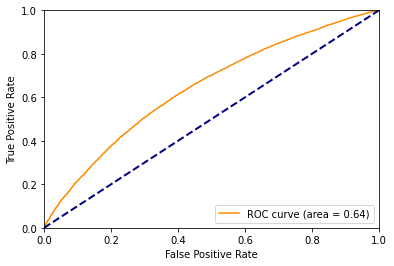

In [70]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [71]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [72]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

In [73]:
# Zeitreihen
timeseries = ["DAYS_CREDIT", "CREDIT_DAY_OVERDUE", "DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT"]

In [74]:
quants = [num/10 for num in range(10+1)]
for index, head in enumerate(timeseries):
    a = bureau[["SK_ID_CURR", head]]
    a = a.groupby(by = ["SK_ID_CURR"]).quantile(quants)
    a = a.unstack(level=-1)
    if index == 0:
        z = a
        continue
    z = pd.merge(z, a , on="SK_ID_CURR")
z.head()

DAYS_ENDDATE_FACT                                               \
                         0.0     0.1     0.2     0.3    0.4    0.5    0.6   
SK_ID_CURR                                                                  
100002               -1185.0 -1111.5 -1038.0 -1002.5 -967.0 -939.0 -911.0   
100003               -2131.0 -1829.0 -1527.0 -1225.0 -923.0 -621.0 -604.8   
100004                -683.0  -652.9  -622.8  -592.7 -562.6 -532.5 -502.4   
100007                -783.0  -783.0  -783.0  -783.0 -783.0 -783.0 -783.0   
100008               -1028.0 -1004.2  -980.4  -956.6 -932.8 -909.0 -885.2   

                                       DAYS_CREDIT_ENDDATE                  \
              0.7    0.8    0.9    1.0                 0.0     0.1     0.2   
SK_ID_CURR                                                                   
100002     -479.5  -48.0  -42.0  -36.0             -1072.0 -1055.0 -1038.0   
100003     -588.6 -572.4 -556.2 -540.0             -2434.0 -1865.8 -1297.6   
100004     -472.3 -442.2 -412.1 -382.0              -595.0  -573.7  -552.4   
100007     -783.0 -783.0 -783.0 -783.0              -783.0  -783.0  -783.0   
100008     -861.4 -837.6 -813.8 -790.0              -853.0  -840.8  -828.6   

                                                                     \
              0.3    0.4    0.5    0.6    0.7    0.8    0.9     1.0   
SK_ID_CURR                                                            
100002     -974.5 -911.0 -424.5   62.0   73.5   85.0  432.5   780.0   
100003     -729.4 -516.0 -480.0 -444.0 -256.4  234.4  725.2  1216.0   
100004     -531.1 -509.8 -488.5 -467.2 -445.9 -424.6 -403.3  -382.0   
100007     -783.0 -783.0 -783.0 -783.0 -783.0 -783.0 -783.0  -783.0   
100008     -816.4 -804.2 -792.0 -539.4 -286.8  -34.2  218.4   471.0   

           CREDIT_DAY_OVERDUE                                               \
                          0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   
SK_ID_CURR                                                                   
100002                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
100003                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
100004                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
100007                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
100008                    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                DAYS_CREDIT                                                  \
            1.0         0.0     0.1     0.2     0.3     0.4     0.5     0.6   
SK_ID_CURR                                                                    
100002      0.0     -1437.0 -1218.6 -1123.4 -1113.2 -1058.6 -1042.5  -962.6   
100003      0.0     -2586.0 -2301.0 -2016.0 -1731.0 -1463.8 -1205.5  -947.2   
100004      0.0     -1326.0 -1234.2 -1142.4 -1050.6  -958.8  -867.0  -775.2   
100007      0.0     -1149.0 -1149.0 -1149.0 -1149.0 -1149.0 -1149.0 -1149.0   
100008      0.0     -1097.0 -1097.0 -1097.0 -1097.0 -1097.0 -1097.0  -893.2   

                                            
               0.7     0.8     0.9     1.0  
SK_ID_CURR                                  
100002      -684.7  -543.6  -364.1  -103.0  
100003      -758.1  -707.4  -656.7  -606.0  
100004      -683.4  -591.6  -499.8  -408.0  
100007     -1149.0 -1149.0 -1149.0 -1149.0  
100008      -689.4  -485.6  -281.8   -78.0

In [75]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [76]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [77]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [78]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [79]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [80]:
# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

In [81]:
# Konfidenzlevel der einzelnen Klassen
y_score = model.fit(x_train, y_train).decision_function(x_test)

In [82]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.0298634 , 0.9701366 ],
       [0.09731354, 0.90268646],
       [0.03545021, 0.96454979],
       ...,
       [0.07970087, 0.92029913],
       [0.07830971, 0.92169029],
       [0.11614802, 0.88385198]])

In [84]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.9194112750071541

In [85]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.6210090260450174


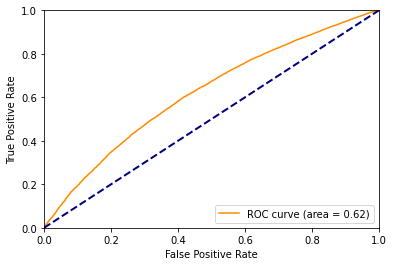

In [86]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()